In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from IPython.display import Math, display
np.set_printoptions(precision=4, suppress=True)

def vec_to_str(vec):
    return "[{:7.4f}, {:7.4f}, {:7.4f}]".format(vec[0], vec[1], vec[2])

### （1）作业7的幂法题目

In [2]:
def power_method(A, N, u, v, print_idx_list=[], check_eig="max", ε=1.0e-3, exact_value=None):
    approx_u = []
    approx_eig = []
    approx_eig_Rayleigh = []

    for k in range(1, N+1):
        v = np.matmul(A, u)
        largest_abs_value = max(v, key=abs)
        u = v / largest_abs_value
        approx_eig.append(largest_abs_value)
        approx_u.append(u)
        approx_eig_Rayleigh.append(np.dot(u, np.matmul(A,u))/np.dot(u,u))

        if k in print_idx_list:
            print("k = {:2d}, u = [{:7.4f} {:7.4f} {:7.4f}]".format(k,u[0],u[1],u[2]))
            print("{:.4f} {:.4f}".format(approx_eig[-1], approx_eig_Rayleigh[-1]))

        if check_eig == "max":
            # 通过max计算的特征值来判断是否结束迭代
            if k >= 2 and np.abs(approx_eig[-1] - approx_eig[-2]) < ε:
                break
        elif check_eig == "Rayleigh":
            # 通过对Rayleigh商法计算得到特征值，判断是否结束迭代
            if k >= 2 and np.abs(approx_eig_Rayleigh[-1] - approx_eig_Rayleigh[-2]) < ε:
                break

    # 如果有参考值，我们可以画特征值近似如何收敛至真解。
    if exact_value != None:

        plt.figure(figsize=(8,4))

        plt.subplot(1,2,1)
        plt.plot(approx_eig, 'ko--', label="Max approx")
        plt.plot(approx_eig_Rayleigh, 'rx--', label="Rayleigh approx")
        plt.plot(exact_value*np.ones(len(approx_eig)), label="exact")
        plt.legend(fontsize=12)
        plt.xlabel("Iteration N",fontsize=12)
        plt.title("Approx. Eig",fontsize=14)

        plt.subplot(1,2,2)
        plt.plot(np.abs(approx_eig - exact_value), 'ko--', label="Max approx")
        plt.plot(np.abs(approx_eig_Rayleigh - exact_value), 'rx--', label="Rayleigh approx")
        plt.yscale("log")
        plt.xlabel("Iteration N",fontsize=12)
        plt.legend(fontsize=12)
        plt.title("Error of Approx.",fontsize=14)

        plt.tight_layout()
        plt.show()

    return approx_eig, approx_u, approx_eig_Rayleigh, u, v

In [3]:
A = np.array([[7.0, 3.0, -2.0],[3.0, 4.0, -1.0], [-2.0, -1.0, 3.0]])
eigv, eigvec = np.linalg.eig(A)
print("特征值为 = " + vec_to_str(eigv))
print()
exact_value = max(eigv, key=abs)
print("主特征值的准确值 = {:.4f}\n".format(exact_value))
for col in range(3):
    c = max(eigvec[:,col], key=abs)
    eigvec[:,col] /= c
    print("λ = {:.4f}  对应的特征向量为 ".format(eigv[col]) + vec_to_str(eigvec[:,col]))

特征值为 = [ 9.6056,  2.0000,  2.3944]

主特征值的准确值 = 9.6056

λ = 9.6056  对应的特征向量为 [ 1.0000,  0.6056, -0.3944]
λ = 2.0000  对应的特征向量为 [-1.0000,  1.0000, -1.0000]
λ = 2.3944  对应的特征向量为 [-0.1315,  0.8685,  1.0000]


k =  1, u = [ 1.0000  0.7500  0.0000]
8.0000 8.8000
k =  2, u = [ 1.0000  0.6486 -0.2973]
9.2500 9.5518


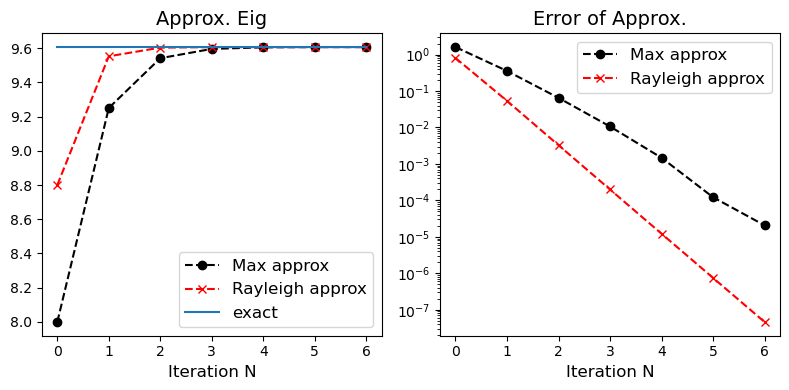


迭代结束后：
u = [ 1.0000,  0.6056, -0.3944]
9.6056 9.6056


In [4]:
N = 10 # 迭代最大的次数
u = np.array([1,1,1])
v = copy.deepcopy(u)
print_idx_list = [1,2]
approx_eig, approx_u, approx_eig_Rayleigh, u, v = power_method(A, N, u, v,
        print_idx_list=print_idx_list, exact_value=exact_value)
print("\n迭代结束后：")
print("u = {:s}".format(vec_to_str(u)))
print("{:.4f} {:.4f}".format(approx_eig[-1], approx_eig_Rayleigh[-1]))

准确值 = 0.5000

k =  1, u = [ 0.3600  0.4400  1.0000]
0.5435 0.4268
k =  2, u = [ 0.2768  0.2806  1.0000]
0.4617 0.4407


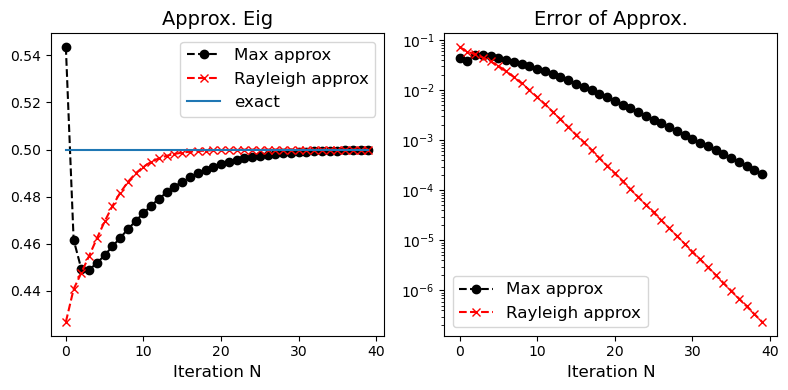


迭代结束后：
u = [ 0.9975, -0.9959,  1.0000]
0.4998 0.5000


In [5]:
Ainv = np.linalg.inv(A)
eigv, eigvec = np.linalg.eig(Ainv)
exact_value = max(eigv, key=abs)
print("准确值 = {:.4f}\n".format(exact_value))

N = 40 # 迭代次数 
u = np.array([1,1,1])
v = copy.deepcopy(u)
print_idx_list = [1,2]
approx_eig, approx_u, approx_eig_Rayleigh, u, v = power_method(Ainv, N, u, v,
        print_idx_list=print_idx_list, check_eig="None", exact_value=exact_value)

print("\n迭代结束后：")
print("u = {:s}".format(vec_to_str(u)))
print("{:.4f} {:.4f}".format(approx_eig[-1], approx_eig_Rayleigh[-1]))

### 备注：
- 由于对该问题，计算$A^{-1}$的主特征值的收敛速度比较慢，我们无法仅仅通过三位有效数字稳定来得到很好的近似。我们需要多迭代几步。
- 其次，在反幂法中，我们直接计算到的值是$1/\lambda$，最后的近似为$1/\lambda \approx 0.5$，我们最后还要求逆转换回来。

### （2）QR算法题目的代码

In [6]:
def qr_algorithm(matrix, num_iterations=10, ε=1.0e-3):
    """
    Perform QR algorithm to find eigenvalues and eigenvectors of a real symmetric matrix.

    Parameters:
    - matrix: The input real symmetric matrix.
    - num_iterations: The number of iterations for the QR algorithm.

    Returns:
    - eigenvalues: An array of eigenvalues.
    - eigenvectors: A matrix where each column is an eigenvector.
    """

    # Initialize variables
    size = matrix.shape[0]
    eigenvectors = np.eye(size)  # Start with the identity matrix
    eigenvalues = np.diag(matrix)
    eigenvalues_mat = np.zeros((size, num_iterations))
    
    for i in range(num_iterations):
        # QR factorization
        q, r = np.linalg.qr(matrix)
        
        # Update matrix with R * Q
        matrix = np.matmul(r, q)

        # Update eigenvectors
        eigenvectors = np.matmul(eigenvectors, q)
        
        eigenvalues_new = np.diag(matrix)
        if np.linalg.norm(eigenvalues_new - eigenvalues) < ε:
            break
        else:
            eigenvalues = eigenvalues_new
            eigenvalues_mat[:,i] = eigenvalues

    # Extract eigenvalues from the diagonal of the resulting matrix
    eigenvalues = np.diag(matrix)

    return eigenvalues, eigenvectors, eigenvalues_mat[:,:(i)], matrix

In [7]:
# np.random.seed(1)
# Create a sample symmetric matrix
# matrix = np.random.randn(3,3)
# matrix = (matrix + matrix.T)/2

# 作业7的例子
matrix = np.array([[1,2,0],[2,-1,1],[0,1,3]])
v, _ = np.linalg.eig(matrix)
print("真实的特征值 = " + vec_to_str(v)) # 参考的真实值

真实的特征值 = [-2.3723,  2.0000,  3.3723]


近似得到的特征值为 = [ 3.3723, -2.3723,  2.0000]


<IPython.core.display.Math object>

     [ 0.0000,  0.0026,  0.0026]



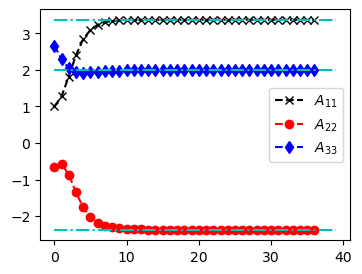

In [8]:
# Perform QR algorithm
N = 40
eigenvalues, eigenvectors, eigv_mat, final_matrix = qr_algorithm(matrix, num_iterations=N, ε=1.0e-6)
print("近似得到的特征值为 = " + vec_to_str(eigenvalues))



err = np.zeros(3)
for i in range(3):
    # validate eigen vectors.
    err[i] = np.linalg.norm(np.matmul(matrix, eigenvectors[:,i])  - eigenvalues[i] * eigenvectors[:,i])
display(Math("\Vert A v_{i} - \lambda_{i} v_{i}\Vert = "))
print("     " + vec_to_str(err))
print()

plt.figure(figsize=(4,3))
plt.plot(eigv_mat[0,:], 'kx--', label=r"$A_{11}$")
plt.plot(eigv_mat[1,:], 'ro--', label=r"$A_{22}$")
plt.plot(eigv_mat[2,:], 'bd--', label=r"$A_{33}$")
for i in range(3):
    plt.plot(eigenvalues[i]*np.ones(N), '-.', color="c")
plt.legend()
plt.show()

In [9]:
print(final_matrix)

[[ 3.3723  0.      0.    ]
 [ 0.     -2.3723  0.0026]
 [ 0.      0.0026  2.    ]]
